In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("IMDB.csv")
print("Whole Data: ")
print(data)
print()
print()

print(data.shape)
print(data.shape[0])
print(data.shape[1])
print(data.shape[0], data.shape[1])
print()
print()

print("Total number of rows in the IMDB Dataset: "+str(data.shape[0])+"")
print("Total number of columns in the IMDB Dataset: "+str(data.shape[1])+"")
print()
print()

########################################################Data Preprocessing for Handling Missing Values####################
movie_titles = data["movie title"].fillna("Unknown")
run_times = data["Run Time"].fillna("Unknown")
movie_ratings = data["Rating"].fillna("Unknown")
number_of_people_rated = data["User Rating"].fillna("Unknown")
movie_genres = data["Generes"].fillna("Unknown")
movie_directors = data["Director"].fillna("Unknown")
movie_writers = data["Writer"].fillna("Unknown")
top5_casts_of_movies = data["Top 5 Casts"].fillna("Unknown")
years_of_movies = data["year"].fillna("Unknown")
movie_overviews = data["Overview"].fillna("Unknown")

print("Movie Titles: ")
print()
print(movie_titles)

print()

print("Movie Run Times: ")
print()
print(run_times)

print()

print("Movie Ratings: ")
print()
print(movie_ratings)

print()

print("Number of people who rated the movies: ")
print()
print(number_of_people_rated)

print()

print("IMDB Movie Overviews: ")
print()
print(movie_overviews)

print()







Whole Data: 
                   movie title                    Run Time Rating User Rating  \
0            Top Gun: Maverick    $170,000,000 (estimated)    8.6        187K   
1      Jurassic World Dominion          2 hours 27 minutes      6         56K   
2                      Top Gun     $15,000,000 (estimated)    6.9        380K   
3                    Lightyear                 $71,101,257    5.2         32K   
4                   Spiderhead                not-released    5.4         23K   
...                        ...                         ...    ...         ...   
24397             Delicatessen  FRF 24,000,000 (estimated)    7.6         85K   
24398                Bitch Ass                not-released    5.5          52   
24399                 Bullwhip                not-released    5.1         398   
24400             The Freshman           1 hour 42 minutes    6.4         20K   
24401           Guys and Dolls      $5,500,000 (estimated)    7.1         18K   

              

In [6]:
##################Finding the min-rated and max-rated movies with following information: Movie name and movie rating##########
minMovieRating = float(movie_ratings[0])
minMovieIndex = 0

maxMovieRating = float(movie_ratings[0])
maxMovieIndex = 0

noRatingList = list()

for i in range(0, len(movie_ratings)):
    movieRating = movie_ratings[i]
    if movieRating != "no-rating":
        movieRating = float(movieRating)
        if movieRating <= minMovieRating:
            minMovieRating = movieRating
            minMovieIndex = i
        if movieRating >= maxMovieRating:
            maxMovieRating = movieRating
            maxMovieIndex = i
    else:
        noRatingList.append(movieRating)
        


minRatedMovie = movie_titles[minMovieIndex]
minRatedMovieRating = minMovieRating

maxRatedMovie = movie_titles[maxMovieIndex]
maxRatedMovieRating = maxMovieRating

print("The movie with the minimum rating is '" + minRatedMovie + "' with a rating of " + str(minRatedMovieRating))
print("The movie with the maximum rating is '" + maxRatedMovie + "' with a rating of " + str(maxRatedMovieRating))
print()
print("There are "+str(len(noRatingList))+" movies with no rating in the IMDB Top 10000 Movies Dataset.")

numberOfFilmsWithRating = len(movie_ratings) - len(noRatingList)
print("There are "+str(numberOfFilmsWithRating)+" movies with rating in the IMDB Top 10000 Movies Dataset.")

percentage_of_movies_with_no_rating = float(0)

print()
percentage_of_movies_with_no_rating = len(noRatingList) / len(movie_ratings)
print(""+str(percentage_of_movies_with_no_rating)+"% of the movies have no ratings within the IMDB Top 10000 Movies Dataset.")

percentage_of_movies_with_rating = 1 - percentage_of_movies_with_no_rating
print(""+str(percentage_of_movies_with_rating)+"% of the movies have ratings within the IMDB Top 10000 Movies Dataset.")
##################################################################################################################################





The movie with the minimum rating is 'Finding Jesus' with a rating of 1.0
The movie with the maximum rating is 'Memory Lane' with a rating of 9.9

There are 1740 movies with no rating in the IMDB Top 10000 Movies Dataset.
There are 22662 movies with rating in the IMDB Top 10000 Movies Dataset.

0.07130563068600934% of the movies have no ratings within the IMDB Top 10000 Movies Dataset.
0.9286943693139906% of the movies have ratings within the IMDB Top 10000 Movies Dataset.


In [7]:
movie_types = ['Action', 'Drama', 'Adventure', 'Crime', 'Comedy', 'Western', 'Horror', 'Musical', 'Sci-Fi']
movie_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(0, len(data["Generes"])):
    for j in range(0, len(movie_types)):
        if movie_types[j] in data["Generes"][i]:
            movie_counts[j] += 1
        
    
print(movie_counts)
print()

maxMovieCount = movie_counts[0]
maxMovieCountIndex = 0

minMovieCount = movie_counts[0]
minMovieCountIndex = 0


###########################Movie counts based on the categories of the movies#####################################
for k in range(0, len(movie_types)):
    if movie_counts[k] >= maxMovieCount:
        maxMovieCount = movie_counts[k]
        maxMovieCountIndex = k
    if movie_counts[k] <= minMovieCount:
        minMovieCount = movie_counts[k]
        minMovieCountIndex = k
        
    print("Number of "+str(movie_types[k])+" movies ==> "+str(movie_counts[k])+"")

###########################Movie counts based on the categories of the movies#####################################
print()
print()
print("Minimum number of movies is from the "+str(movie_types[minMovieCountIndex])+" category with count: "+str(minMovieCount)+"")
print("Maximum number of movies is from the "+str(movie_types[maxMovieCountIndex])+" category with count: "+str(maxMovieCount)+"")   
    

[7847, 12475, 4454, 6050, 6870, 610, 3210, 321, 2088]

Number of Action movies ==> 7847
Number of Drama movies ==> 12475
Number of Adventure movies ==> 4454
Number of Crime movies ==> 6050
Number of Comedy movies ==> 6870
Number of Western movies ==> 610
Number of Horror movies ==> 3210
Number of Musical movies ==> 321
Number of Sci-Fi movies ==> 2088


Minimum number of movies is from the Musical category with count: 321
Maximum number of movies is from the Drama category with count: 12475


In [8]:
import re

########################Movie Overviews#######################################################################
for index, overview in enumerate(movie_overviews):
    movie_overview_arr = re.split(r'\W+', str(overview))
    movie_overview_arr = [word for word in movie_overview_arr if word]
    movie_title = data["movie title"][index]
    print(f"The movie overview for the movie {movie_title} has a length of: {len(movie_overview_arr)}")



The movie overview for the movie Top Gun: Maverick has a length of: 38
The movie overview for the movie Jurassic World Dominion has a length of: 50
The movie overview for the movie Top Gun has a length of: 38
The movie overview for the movie Lightyear has a length of: 29
The movie overview for the movie Spiderhead has a length of: 38
The movie overview for the movie Everything Everywhere All at Once has a length of: 30
The movie overview for the movie Interceptor has a length of: 29
The movie overview for the movie Interceptor has a length of: 33
The movie overview for the movie Black Adam has a length of: 42
The movie overview for the movie The Northman has a length of: 27
The movie overview for the movie Thor: Love and Thunder has a length of: 25
The movie overview for the movie Fantastic Beasts: The Secrets of Dumbledore has a length of: 22
The movie overview for the movie The Unbearable Weight of Massive Talent has a length of: 29
The movie overview for the movie Jurassic Park has 

In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on movie overviews
for index, overview in enumerate(movie_overviews):
    sentiment_scores = sia.polarity_scores(str(overview))
    
    movie_title = movie_titles[index]
    print(f"Sentiment analysis for the movie {movie_title}:")
    print("Positive sentiment score:", sentiment_scores['pos'])
    print("Negative sentiment score:", sentiment_scores['neg'])
    print("Neutral sentiment score:", sentiment_scores['neu'])
    print("Compound sentiment score:", sentiment_scores['compound'])
    print()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Barış\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis for the movie Top Gun: Maverick:
Positive sentiment score: 0.131
Negative sentiment score: 0.035
Neutral sentiment score: 0.833
Compound sentiment score: 0.5859

Sentiment analysis for the movie Jurassic World Dominion:
Positive sentiment score: 0.042
Negative sentiment score: 0.071
Neutral sentiment score: 0.886
Compound sentiment score: -0.3612

Sentiment analysis for the movie Top Gun:
Positive sentiment score: 0.252
Negative sentiment score: 0.066
Neutral sentiment score: 0.682
Compound sentiment score: 0.802

Sentiment analysis for the movie Lightyear:
Positive sentiment score: 0.0
Negative sentiment score: 0.103
Neutral sentiment score: 0.897
Compound sentiment score: -0.4939

Sentiment analysis for the movie Spiderhead:
Positive sentiment score: 0.232
Negative sentiment score: 0.032
Neutral sentiment score: 0.736
Compound sentiment score: 0.8271

Sentiment analysis for the movie Everything Everywhere All at Once:
Positive sentiment score: 0.152
Negative sentim

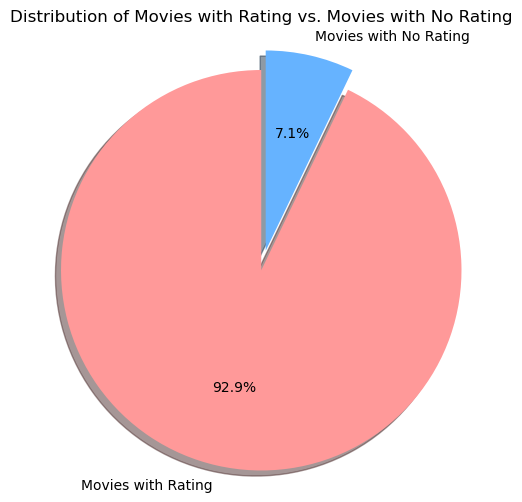

In [10]:
import matplotlib.pyplot as plt

labels = ['Movies with Rating', 'Movies with No Rating']
sizes = [percentage_of_movies_with_rating, percentage_of_movies_with_no_rating]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  
plt.title('Distribution of Movies with Rating vs. Movies with No Rating')
plt.show()


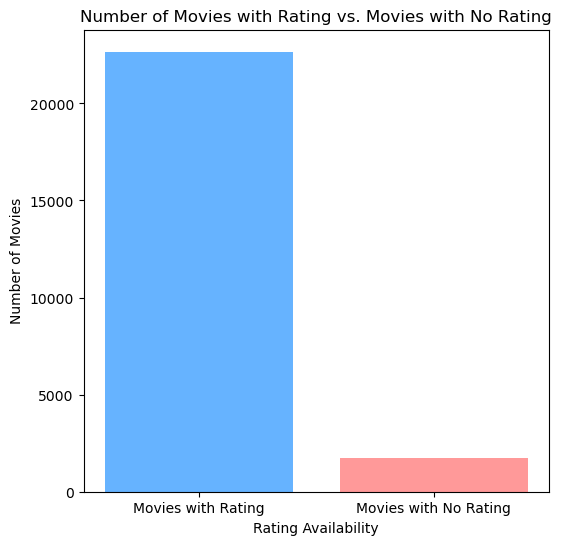

In [11]:
# Data for bar chart
x = ['Movies with Rating', 'Movies with No Rating']
y = [numberOfFilmsWithRating, len(noRatingList)]
colors = ['#66b3ff', '#ff9999']

# Plotting bar chart
plt.figure(figsize=(6, 6))
plt.bar(x, y, color=colors)
plt.xlabel('Rating Availability')
plt.ylabel('Number of Movies')
plt.title('Number of Movies with Rating vs. Movies with No Rating')
plt.show()

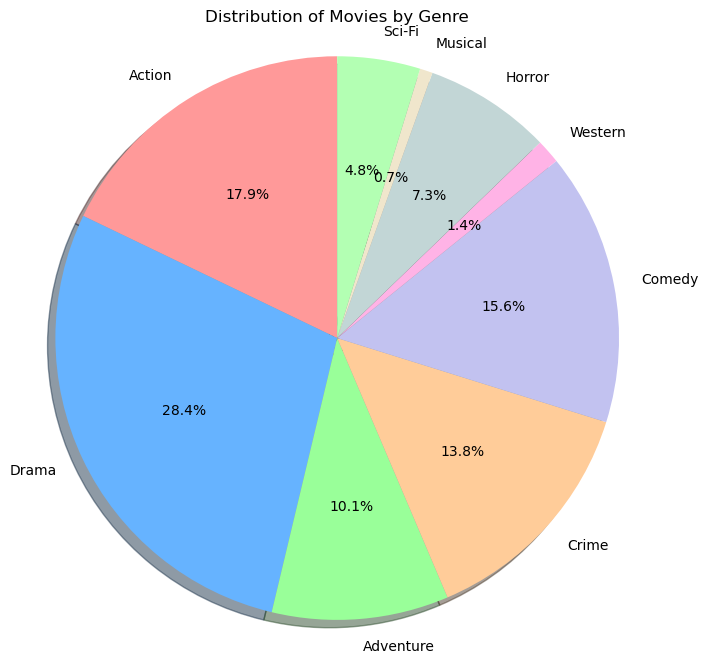

In [12]:
import matplotlib.pyplot as plt

# Data for pie chart
labels = movie_types
sizes = movie_counts
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2d6d6', '#f0e6cc', '#b3ffb3']

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Movies by Genre')
plt.show()


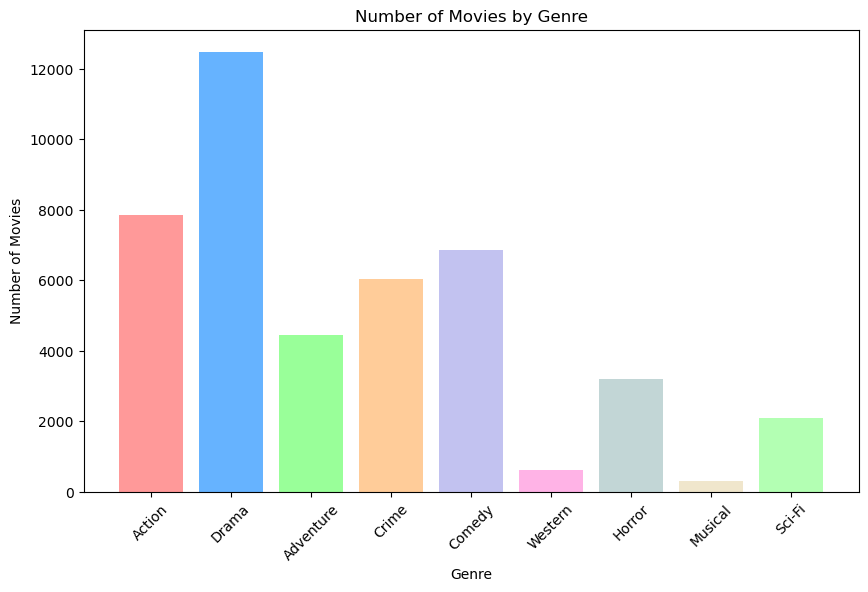

In [13]:
# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(movie_types, movie_counts, color=colors)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

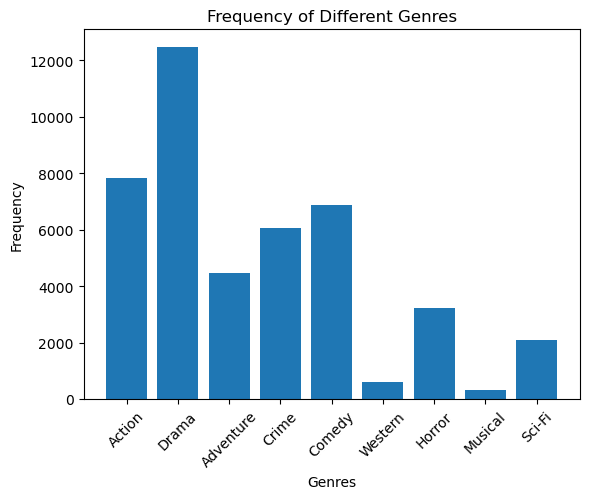

In [14]:
import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(movie_types, movie_counts)

# Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Different Genres')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


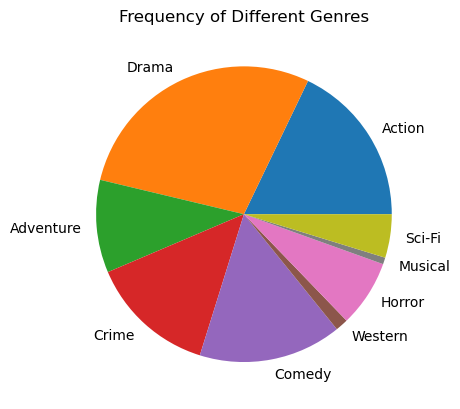

In [16]:
plt.pie(movie_counts, labels=movie_types)
plt.title('Frequency of Different Genres')
plt.show()